In [51]:
library(ggplot2)#cool plots
library(psych)#use it for describe command
library(PerformanceAnalytics)#for correlation matrix
library(AICcmodavg)#AIC model comparison
library(broom)#facilitates model predicions

## Replicating analyses made in the study:

Reyes, P. D., Baldovino, M. C., &amp; Aguiar, L. M. (2022). Urine washing in urban robust capuchin monkeys (<i>Sapajus sp. </i>): The relation with visitors. American Journal of Primatology. https://doi.org/10.1002/ajp.23381 

**Abstract**

> In primates, urine washing (UW) is a behavior in which individuals intentionally deposit urine on their bodies. Social and nonsocial hypotheses have been proposed to explain the adaptive function of this behavior. For capuchins, different functions have been assigned for UW, suggesting it as a flexible behavior, but studies have been mainly in captivity. However, no investigations have been performed in urban environments, where these animals can modify their behavior. Our goal was to study UW in a semi-provisioned group of an introduced unknown robust capuchin species (Sapajus sp.) living in a tiny urban fragment in Foz do Iguaçu, Brazil, where they have contact with humans. We assessed the influence of social (sexual, agonistic, and anointing behaviors) and environmental (temperature, relative air humidity, height of the monkeys in the trees, number of people present in the fragment, and human-monkey interactions) variables, the influence of behavior before and after UW, and the influence of sex-age classes, on the frequency of UW. We observed 75 records of UW in 300 h of observations, where urine was mostly deposited on hands and passed on to feet (95%). There were no significant differences in the frequency of the behavior between sex-age classes nor in the behaviors before and after UW. Around 50% of UW took place in the late morning and we found no correlation between UW and temperature, relative air humidity, nor the heights of the monkeys in the trees. However, we found a significant association between UW and the daily number of people in the fragment, but not between UW and human-monkey interactions, anointing, agonisms, and sexual behavior. Our study increases the scope of UW flexibility by identifying the presence of visitors affecting the occurrence of this behavior. We discussed different possibilities through which people could influence the capuchins to display UW.

**RESEARCH HIGHLIGHT**

> Urine washing (UW) observed in urban robust capuchins is positively associated with the number of people observed inside the forest, increasing the scope of the flexibility of UW by including people as influencers of the display of this behavior in capuchins.**

In [1]:
urine.df<-read.csv("urine.df.csv")

In [31]:
head(urine.df)
str(urine.df)

,days,u_behav,people_frag,hum_mon_int,anoin_behav,agon_behav
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,35,2,0,NA
2,2,1,NA,NA,0,1
3,3,1,39,2,0,0
4,4,0,24,3,0,0
5,5,0,30,4,0,0
6,6,0,NA,NA,0,0


'data.frame':	30 obs. of  6 variables:
 $ days       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ u_behav    : int  0 1 1 0 0 0 0 3 4 0 ...
 $ people_frag: int  35 NA 39 24 30 NA 52 9 56 32 ...
 $ hum_mon_int: int  2 NA 2 3 4 NA 6 0 6 2 ...
 $ anoin_behav: int  0 0 0 0 0 0 0 0 0 0 ...
 $ agon_behav : int  NA 1 0 0 0 0 6 1 4 2 ...


In [36]:
describe(urine.df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
days,1,30,15.5000000,8.8034084,15.5,15.5000000,11.1195,1,30,29,0.0000000,-1.3204946,1.6072751
u_behav,2,30,2.4333333,2.4450278,1.0,2.1250000,1.4826,0,8,8,0.7689392,-0.5393732,0.4463990
people_frag,3,28,44.8928571,21.9094759,38.0,43.0833333,17.7912,9,106,97,0.8829260,0.3936095,4.1405017
hum_mon_int,4,28,5.1785714,3.5177178,5.0,4.9166667,2.9652,0,15,15,0.7038379,0.3796770,0.6647862
anoin_behav,5,30,0.2666667,0.5208305,0.0,0.1666667,0.0000,0,2,2,1.6840409,1.9277784,0.0950902
agon_behav,6,29,2.0689655,1.9808194,2.0,1.8800000,1.4826,0,7,7,0.8663264,-0.3009602,0.3678289


In [3]:
library(ggplot2)

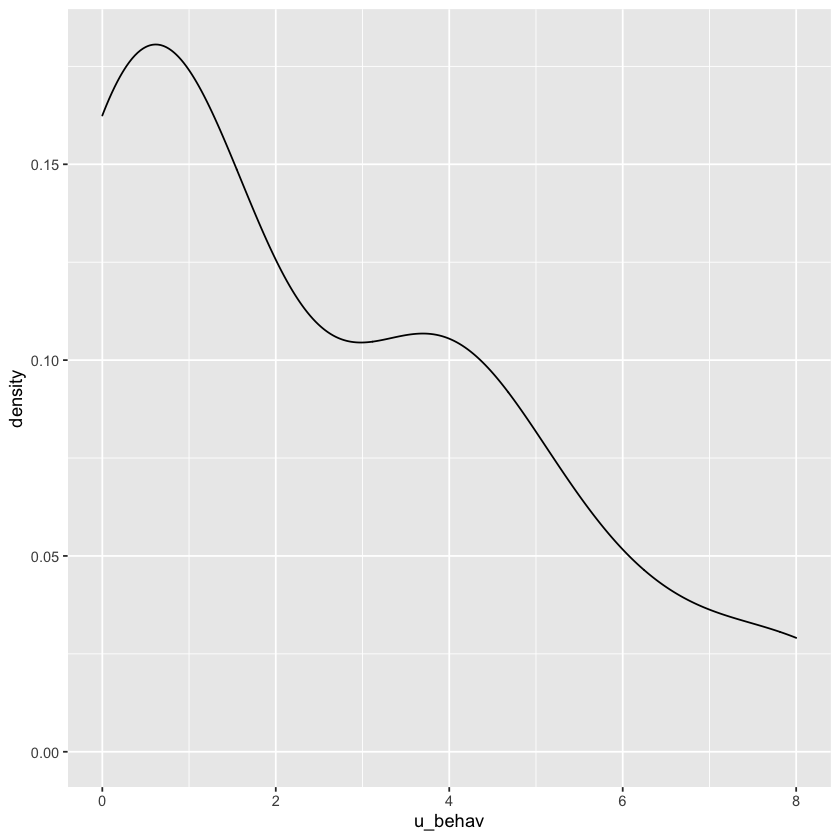

In [8]:
ggplot(urine.df,aes(u_behav))+geom_density()

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


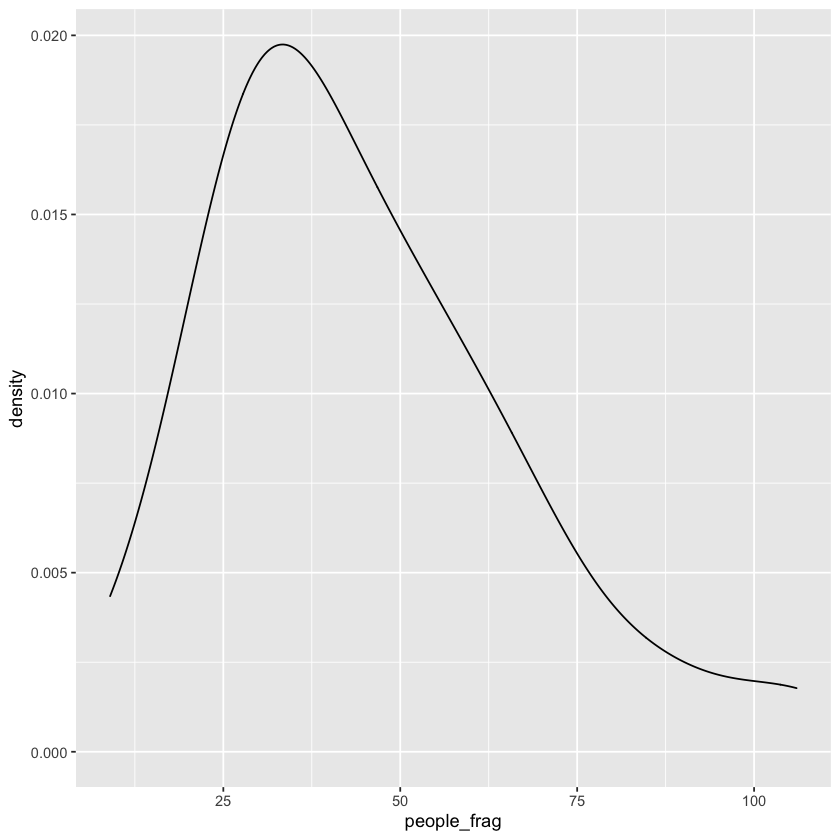

In [9]:
ggplot(urine.df,aes(people_frag))+geom_density()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


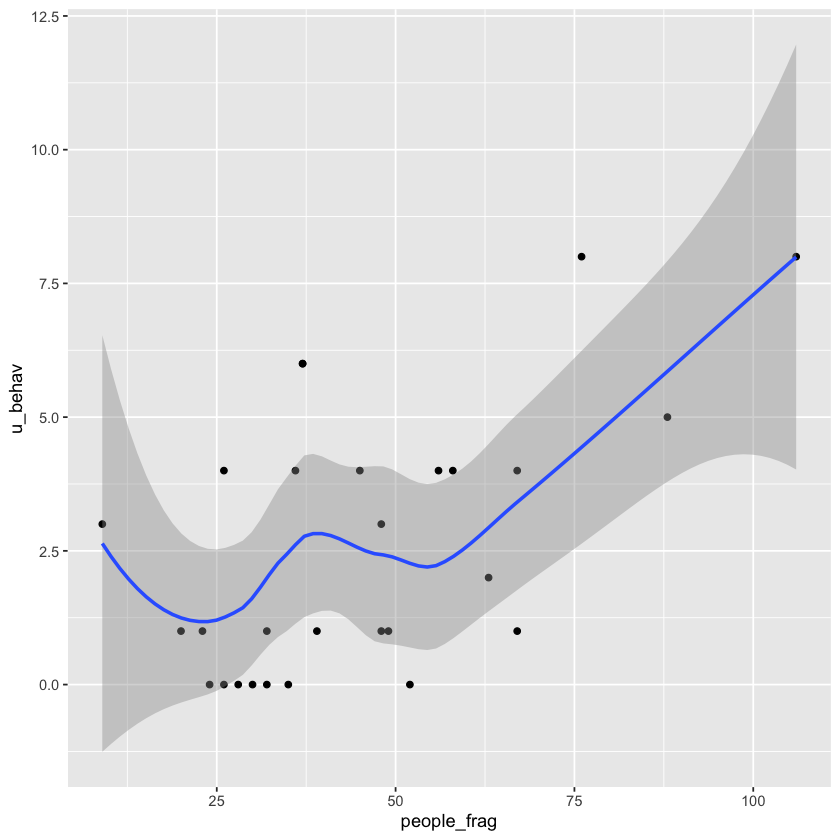

In [4]:
ggplot(urine.df,aes(people_frag,u_behav))+geom_point()+geom_smooth()

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


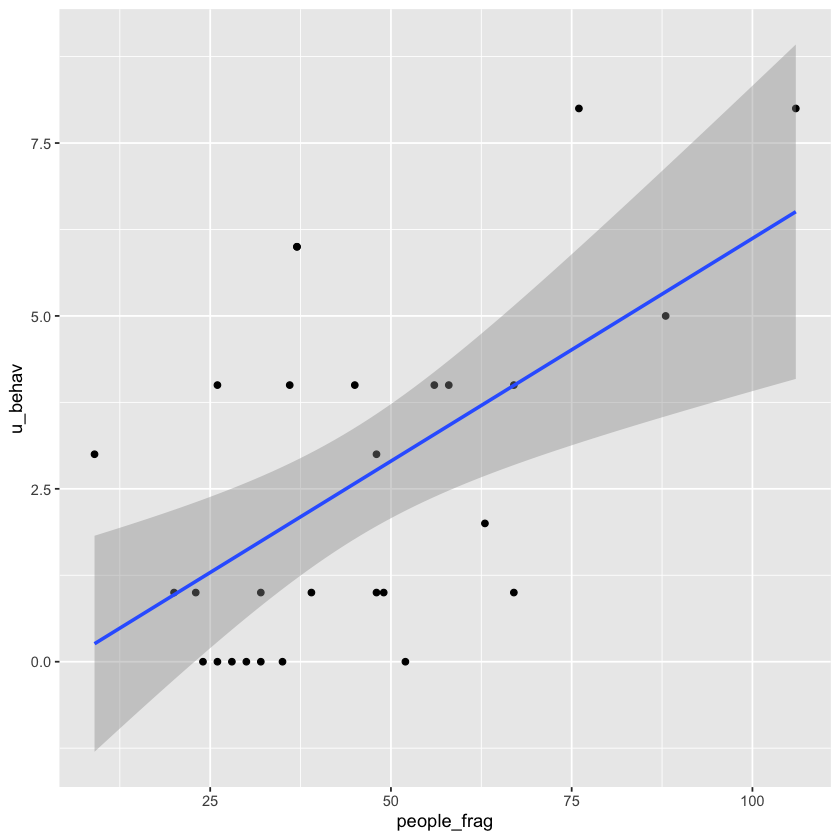

In [5]:
#as shown in the paper:
ggplot(urine.df,aes(people_frag,u_behav))+geom_point()+geom_smooth(method="lm")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


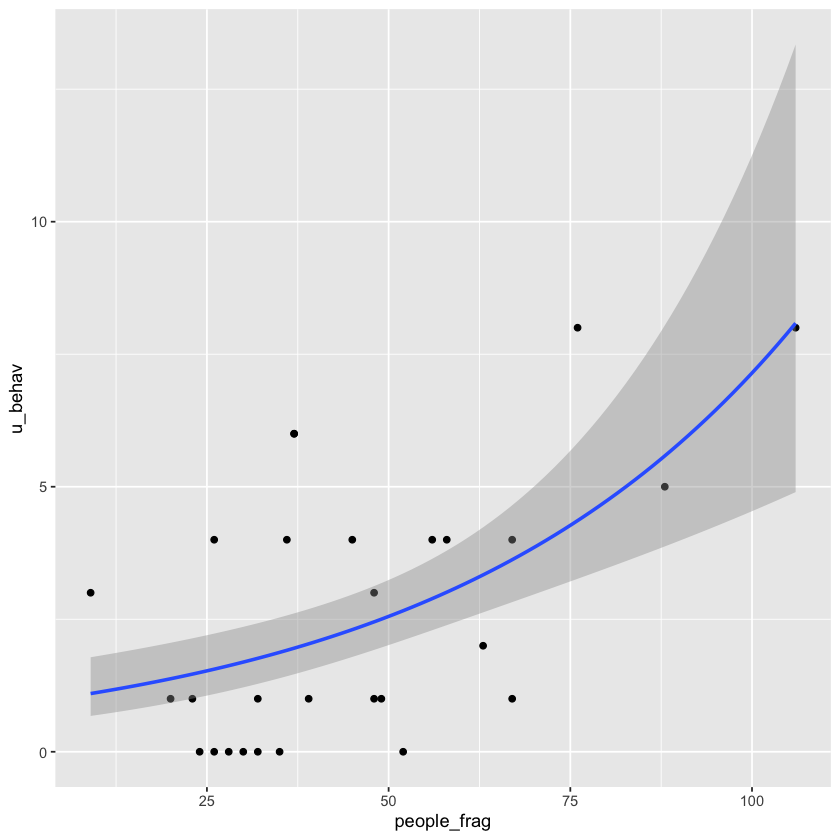

In [10]:
#this is the correct way to plot a poisson regression, the previous
#best fitted regression line is based on a linear model
#so ok for ilustrative purposes, but that is not actually how
#the poisson regression fits data
#this one is:

ggplot(urine.df,aes(people_frag,u_behav))+geom_point(size)+
  geom_smooth(method = 'glm', 
              method.args = list(family = 'poisson')
              )+theme_bw()

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


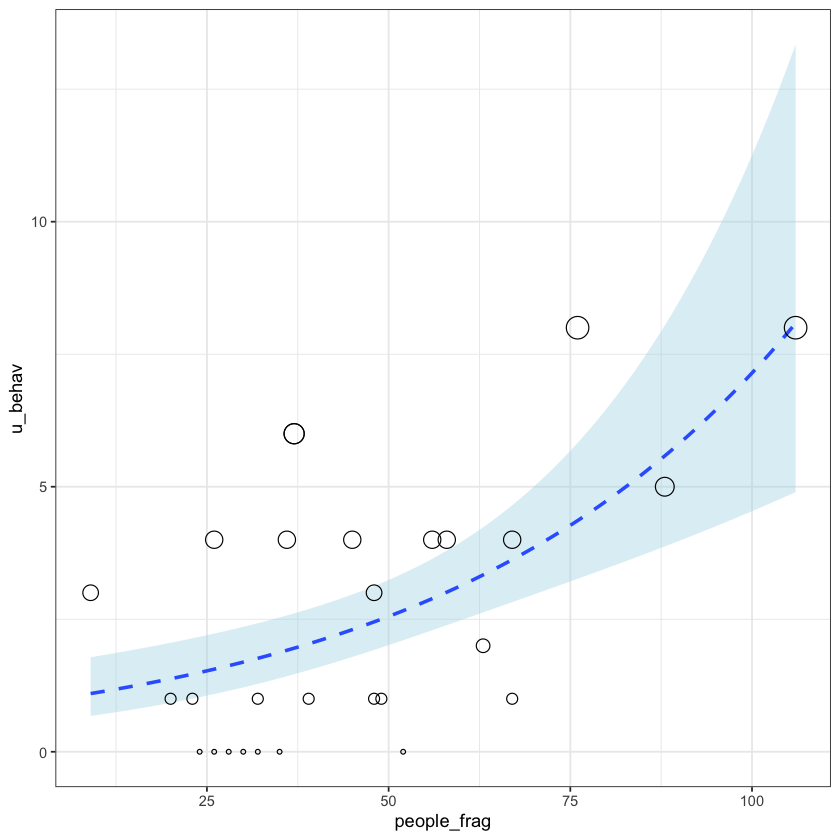

In [30]:
#tune it
ggplot(urine.df,aes(people_frag,u_behav))+
  geom_smooth(method = 'glm', 
              method.args = list(family = 'poisson'),fill="light blue",
              linetype = "dashed")+
geom_point(aes(size=u_behav),shape=21)+
theme_bw()+ 
theme (legend.position="none")

In [37]:
#without NA, so that we can compare models
complete.df<-urine.df[complete.cases(urine.df),]

In [38]:
describe(complete.df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
days,1,27,16.8888889,8.1161441,17,16.9565217,10.3782,3,30,27,-0.05833609,-1.2773678,1.5619527
u_behav,2,27,2.6666667,2.4651416,2,2.4347826,2.9652,0,8,8,0.63786729,-0.7220214,0.4744167
people_frag,3,27,45.2592593,22.2392456,39,43.4347826,19.2738,9,106,97,0.83115633,0.2573619,4.2799448
hum_mon_int,4,27,5.2962963,3.5280722,5,5.0434783,2.9652,0,15,15,0.65414903,0.3457396,0.6789778
anoin_behav,5,27,0.2962963,0.5417078,0,0.2173913,0.0000,0,2,2,1.51812368,1.3228294,0.1042517
agon_behav,6,27,2.1851852,2.0007121,2,2.0000000,1.4826,0,7,7,0.78161665,-0.4611144,0.3850372


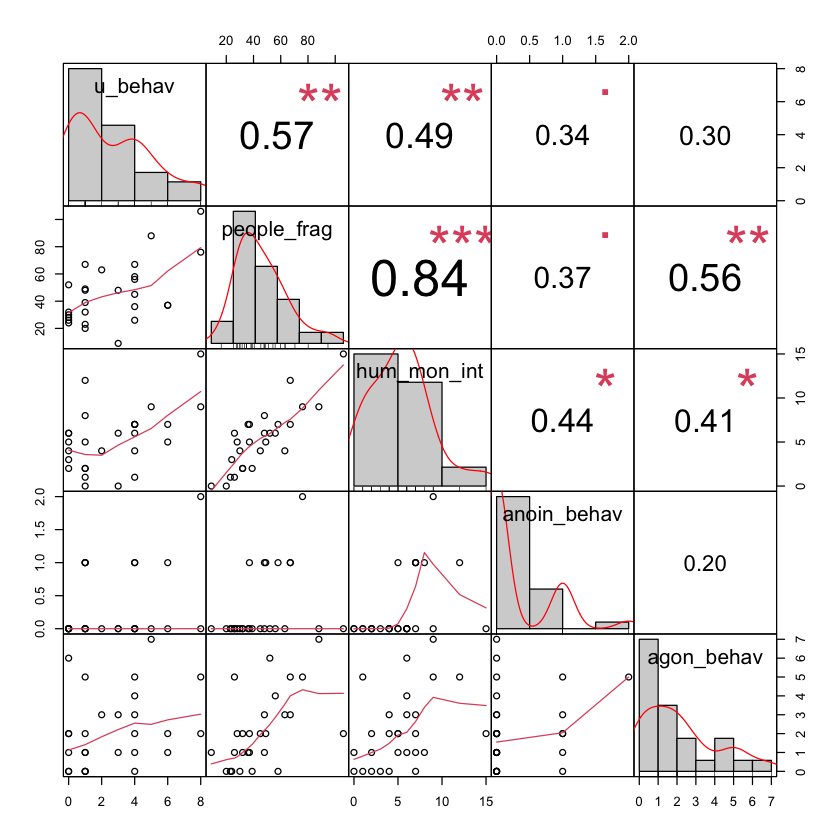

In [40]:
data.cor <-complete.df[,c(2:6)]
chart.Correlation(data.cor, histogram=TRUE, pch=19)
#many autocorrelation issues

In [41]:
#convert anoin_behaviour to factor with 3 levels
complete.df$anoin_behav<-as.factor(complete.df$anoin_behav)

In [42]:
str(complete.df)

'data.frame':	27 obs. of  6 variables:
 $ days       : int  3 4 5 7 8 9 10 11 12 13 ...
 $ u_behav    : int  1 0 0 0 3 4 0 1 1 2 ...
 $ people_frag: int  39 24 30 52 9 56 32 20 23 63 ...
 $ hum_mon_int: int  2 3 4 6 0 6 2 0 1 4 ...
 $ anoin_behav: Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ agon_behav : int  0 0 0 6 1 4 2 0 0 3 ...


In [47]:
#the possible models without correlation issues
model.people<-glm(u_behav~people_frag,family=poisson,data=complete.df)
model.int<-glm(u_behav~hum_mon_int,family=poisson,data=complete.df)
model.ano<-glm(u_behav~anoin_behav,family=poisson,data=complete.df)
model.agon<-glm(u_behav~agon_behav,family=poisson,data=complete.df)
model.anoago<-glm(u_behav~anoin_behav+agon_behav,family=poisson,data=complete.df)

In [49]:
#guardamos la lista de modelos en models
models <- list(model.people,model.int,model.ano,model.agon,model.anoago)
mod.names <- c('model.people','model.int','model.ano','model.agon','model.anoago')
aictab(cand.set = models, modnames = mod.names)

,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,model.people,2,115.4561,0.000000,1.000000000,0.855731339,-55.47803,0.8557313
2,model.int,2,119.1142,3.658176,0.160559918,0.137396154,-57.30712,0.9931275
3,model.ano,3,127.0483,11.592263,0.003039290,0.002600815,-60.00242,0.9957283
4,model.agon,2,127.2131,11.757028,0.002798941,0.002395142,-61.35654,0.9981234
5,model.anoago,4,127.7011,12.245043,0.002192920,0.001876550,-58.94146,1.0000000


In [50]:
summary(model.people)


Call:
glm(formula = u_behav ~ people_frag, family = poisson, data = complete.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3423  -1.3951  -0.4036   0.7588   2.2411  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.016113   0.284698  -0.057    0.955    
people_frag  0.019715   0.004588   4.297 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 66.897  on 26  degrees of freedom
Residual deviance: 50.092  on 25  degrees of freedom
AIC: 114.96

Number of Fisher Scoring iterations: 5


In [52]:
aug.pred<-augment(model.people)

In [62]:
aug.pred$values<-exp(aug.pred$.fitted)

In [63]:
head(aug.pred)

.rownames,u_behav,people_frag,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd,values
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,39,0.7527852,-0.8603712,-0.8795563,0.04314866,1.433511,0.013995988,2.122905
4,0,24,0.4570550,-1.7773102,-1.8302602,0.05702371,1.395568,0.050643114,1.579416
5,0,30,0.5753471,-1.8856020,-1.9355478,0.05094308,1.389636,0.050273690,1.777747
7,0,52,1.0090848,-2.3422593,-2.3896382,0.03926052,1.359873,0.058338431,2.743089
8,3,9,0.1613247,1.4049407,1.4585013,0.07209750,1.413702,0.118663509,1.175066
9,4,56,1.0879462,0.5684443,0.5805409,0.04123937,1.439842,0.008046138,2.968172


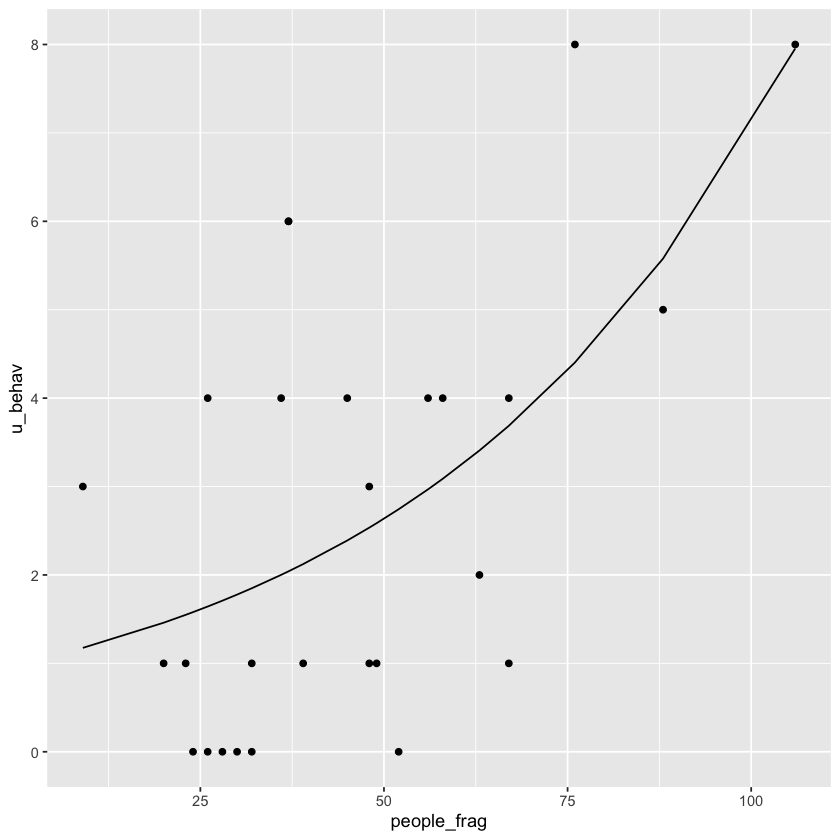

In [64]:
ggplot(aug.pred,aes(people_frag,u_behav))+
geom_point()+
geom_line(aes(people_frag,values))

In [88]:
#traditional way
new.people=data.frame(people_frag=0:200)

In [95]:
fitted.value<-exp(predict(model.people,new.people))

In [96]:
prediction.df2<-cbind(new.people,fitted.value)

In [97]:
head(prediction.df2)

,people_frag,fitted.value
,<int>,<dbl>
1,0,0.9840157
2,1,1.0036084
3,2,1.0235913
4,3,1.0439720
5,4,1.0647585
6,5,1.0859589


Warning message:
“Removed 2 rows containing missing values (geom_point).”


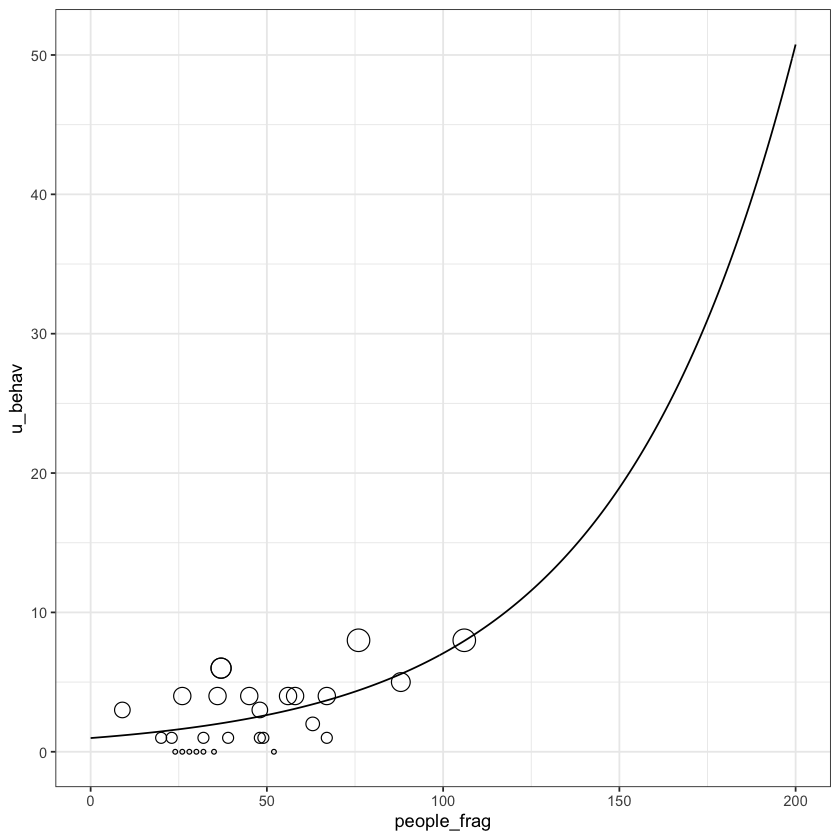

In [98]:
ggplot(urine.df,aes(people_frag,u_behav))+
geom_point(aes(size=u_behav),shape=21)+
geom_line(data=prediction.df2,aes(people_frag,fitted.value))+
theme_bw()+ 
theme (legend.position="none")

In [102]:
tail(exp(predict(model.people, newdata = new.people, interval = "confidence")))

196      197      198      199      200      201 
45.98797 46.90363 47.83753 48.79002 49.76148 50.75228

In [103]:
tail(exp(predict(model.people, newdata = new.people, interval = "interval")))

196      197      198      199      200      201 
45.98797 46.90363 47.83753 48.79002 49.76148 50.75228

In [104]:
tail(exp(predict(model.people, newdata = new.people, response = "confidence")))

196      197      198      199      200      201 
45.98797 46.90363 47.83753 48.79002 49.76148 50.75228

In [111]:
prediction.df3<-predict(model.people, newdata = new.people, se.fit = TRUE)

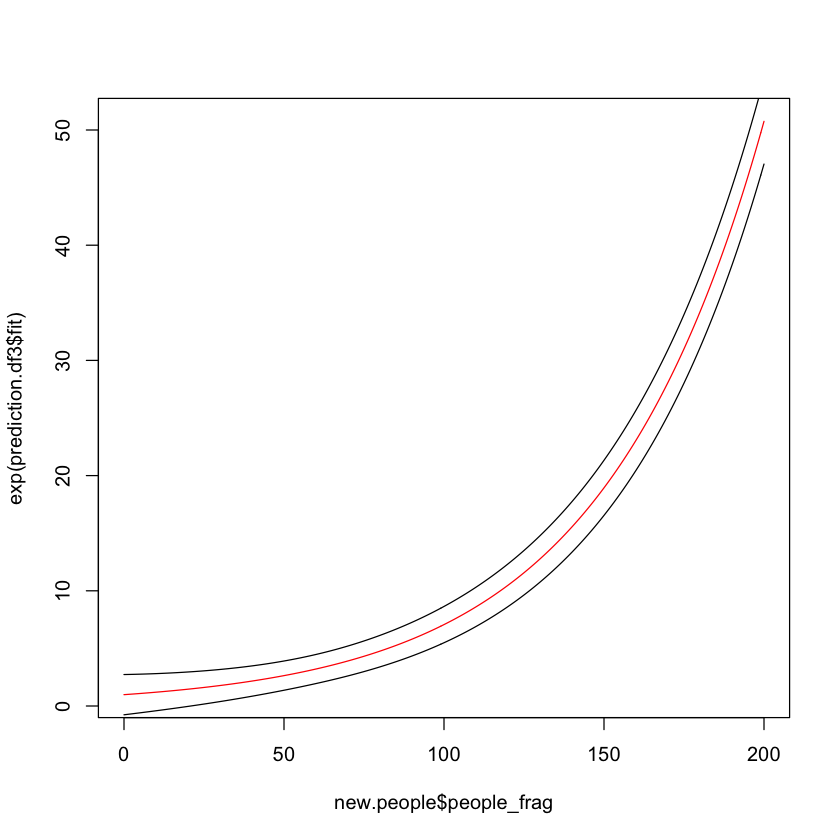

In [125]:
plot(new.people$people_frag,exp(prediction.df3$fit),type="l",cex=3,col="red")
lines(new.people$people_frag,exp(prediction.df3$fit)+exp(1.96*prediction.df3$se.fit))
lines(new.people$people_frag,exp(prediction.df3$fit)-exp(1.96*prediction.df3$se.fit))
#not quite
#https://stackoverflow.com/questions/40985366/prediction-of-poisson-regression

<https://stackoverflow.com/questions/40985366/prediction-of-poisson-regression>

"Your confidence interval is not correctly computed. Response is not normally distributed, so you can't use 1.96. Linear predictor is asymptotically normal, so you need produce confidence band for linear predictor, then transform it to response scale using inverse link function."

In [129]:
ginv <- model.people$family$linkinv  ## inverse link function

In [132]:
prs <- predict(model.people,new.people, type = "link", se.fit=TRUE)
new.people$pred <- ginv(prs[[1]])
new.people$lo <- ginv(prs[[1]] - 1.96 * prs[[2]])
new.people$up <- ginv(prs[[1]] + 1.96 * prs[[2]])

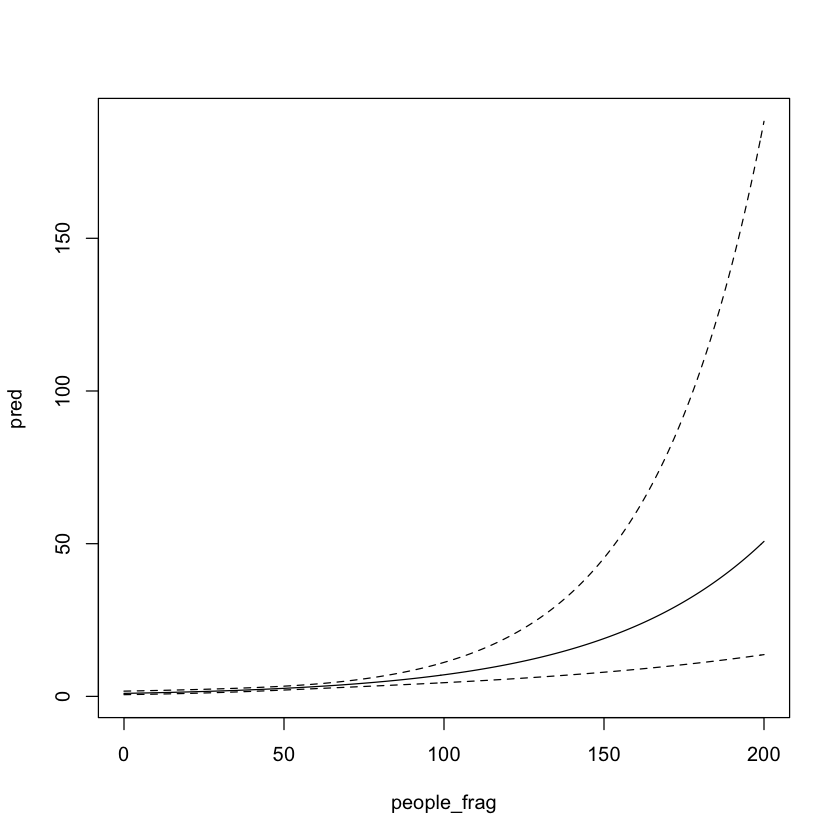

In [134]:
with(new.people, plot(people_frag, pred, type = "l", ylim = c(min(lo), max(up)) ))
with(new.people, lines(people_frag, lo, lty = 2))
with(new.people, lines(people_frag, up, lty = 2))

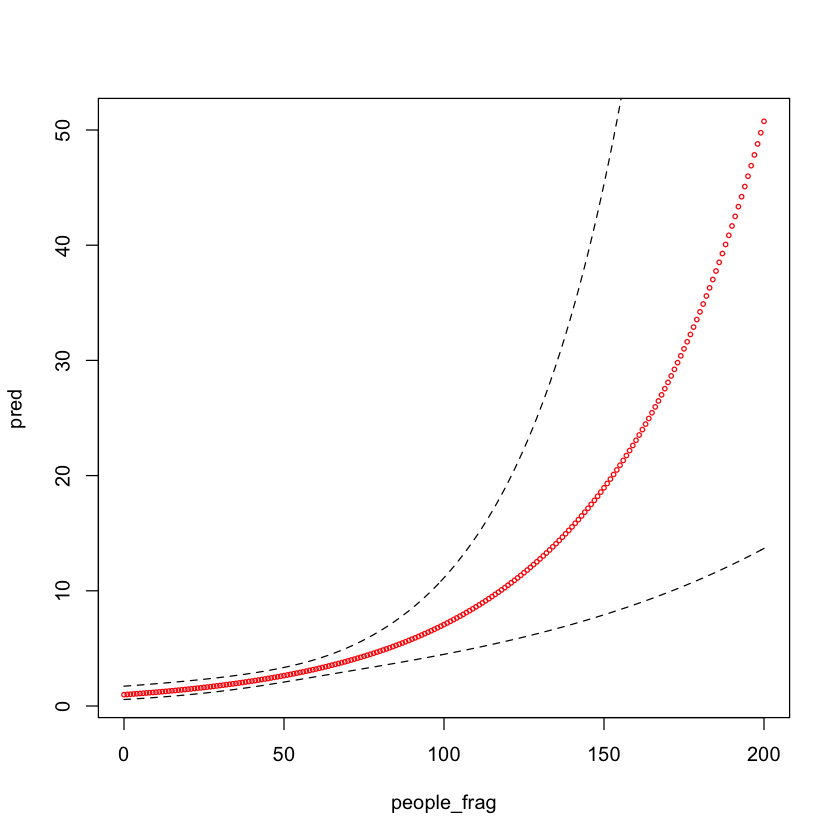

In [145]:
with(new.people, plot(people_frag, pred, 
                      type = "b",
                     cex=0.5,col="red"))
with(new.people, lines(people_frag, lo, lty = 2))
with(new.people, lines(people_frag, up, lty = 2))

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 47 row(s) containing missing values (geom_path).”


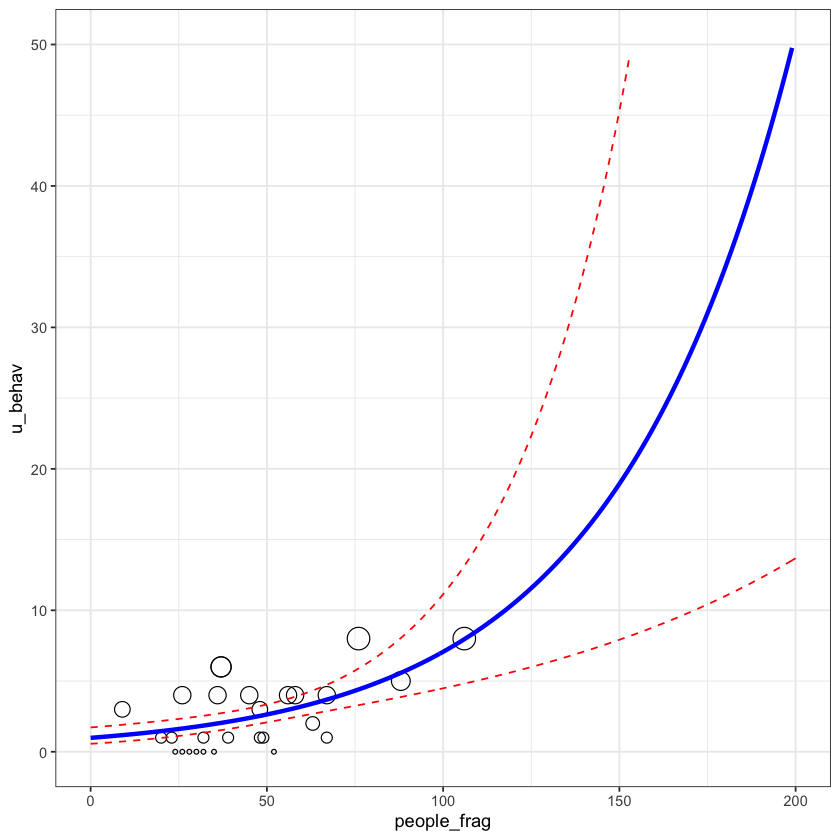

In [154]:
#back to ggplot
ggplot(urine.df,aes(people_frag,u_behav))+
geom_point(aes(size=u_behav),shape=21)+
geom_line(data=new.people,aes(people_frag,pred),size=1.25,col="blue")+
geom_line(data=new.people,aes(people_frag,lo),color = "red", linetype = "dashed")+
geom_line(data=new.people,aes(people_frag,up),color = "red", linetype = "dashed")+
theme_bw()+ 
theme (legend.position="none")+
ylim(0,50)
#see also 
#http://www.sthda.com/english/articles/40-regression-analysis/166-predict-in-r-model-predictions-and-confidence-intervals/

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 83 row(s) containing missing values (geom_path).”
Warning message:
“Removed 75 row(s) containing missing values (geom_path).”
Warning message:
“Removed 104 row(s) containing missing values (geom_path).”


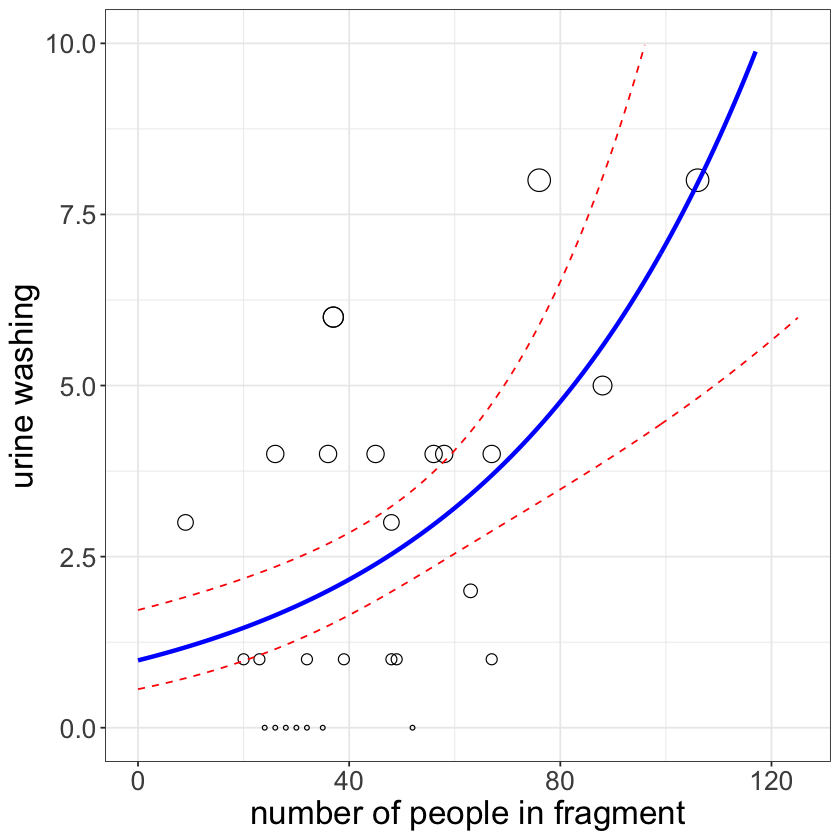

In [157]:
ggplot(urine.df,aes(people_frag,u_behav))+
geom_point(aes(size=u_behav),shape=21)+
geom_line(data=new.people,aes(people_frag,pred),size=1.25,col="blue")+
geom_line(data=new.people,aes(people_frag,lo),color = "red", linetype = "dashed")+
geom_line(data=new.people,aes(people_frag,up),color = "red", linetype = "dashed")+
theme_bw()+ 
theme (legend.position="none")+
ylim(0,10)+
xlim(0,125)+
theme(text = element_text(size = 20))+
ylab("urine washing")+
xlab("number of people in fragment")